In [2]:
import pandas as pd
import sys
import os


In [3]:
scripts_path = "../scripts"
sys.path.append(scripts_path)

In [4]:
# Import all our custom functions
import passenger_flow_utils as pfu

# Configure pandas display options
pd.set_option('display.max_rows', 100)

In [5]:
import os
print(os.listdir(scripts_path))

['passenger_flow_utils.py', '__init__.py', '__pycache__']


In [6]:
# --- Main Configuration ---
# Change these variables to run the analysis on a different line
FILE_PATH = '../data/NS-Passenger flow-station-hour.csv' # <-- CHANGE THIS
LINE_PREFIX = 'NS'                                      # <-- CHANGE THIS
LINE_NAME = 'North-South Line'                          # <-- CHANGE THIS

In [7]:
# Load and prepare the data using our utility function
df_ew = pfu.load_and_prepare_data(FILE_PATH, LINE_PREFIX)

# Perform basic checks
pfu.basic_checks(df_ew)

--- Shape ---
(16, 18)

--- Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Station  16 non-null     object
 1   NS6      16 non-null     int64 
 2   NS7      16 non-null     int64 
 3   NS8      16 non-null     int64 
 4   NS9      16 non-null     int64 
 5   NS10     16 non-null     int64 
 6   NS11     16 non-null     int64 
 7   NS12     16 non-null     int64 
 8   NS13     16 non-null     int64 
 9   NS14     16 non-null     int64 
 10  NS15     16 non-null     int64 
 11  NS21     16 non-null     int64 
 12  NS22     16 non-null     int64 
 13  NS23     16 non-null     int64 
 14  NS24     16 non-null     int64 
 15  NS25     16 non-null     int64 
 16  NS26     16 non-null     int64 
 17  NS27     16 non-null     int64 
dtypes: int64(17), object(1)
memory usage: 2.4+ KB

--- Null Values ---
Station    0
NS6        0
NS7        0
NS8      

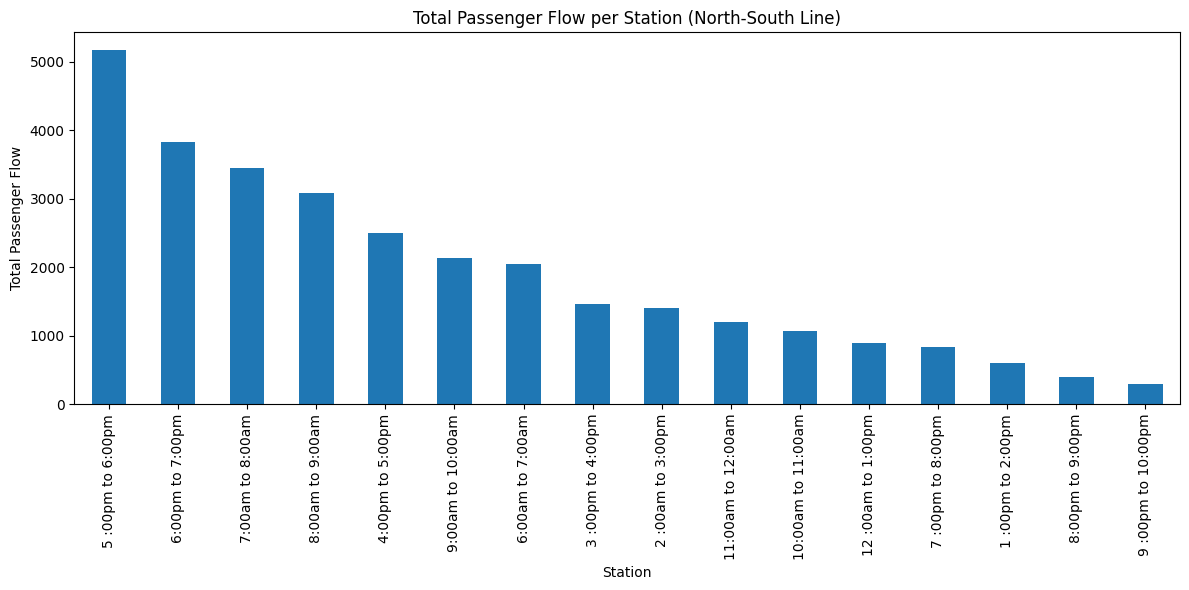

In [8]:
# Add the 'TotalFlow' column for analysis
df_ew = pfu.add_total_flow(df_ew)

# Plot the total flow
pfu.plot_total_flow_per_station(
    df_ew,
    title=f'Total Passenger Flow per Station ({LINE_NAME})'
)

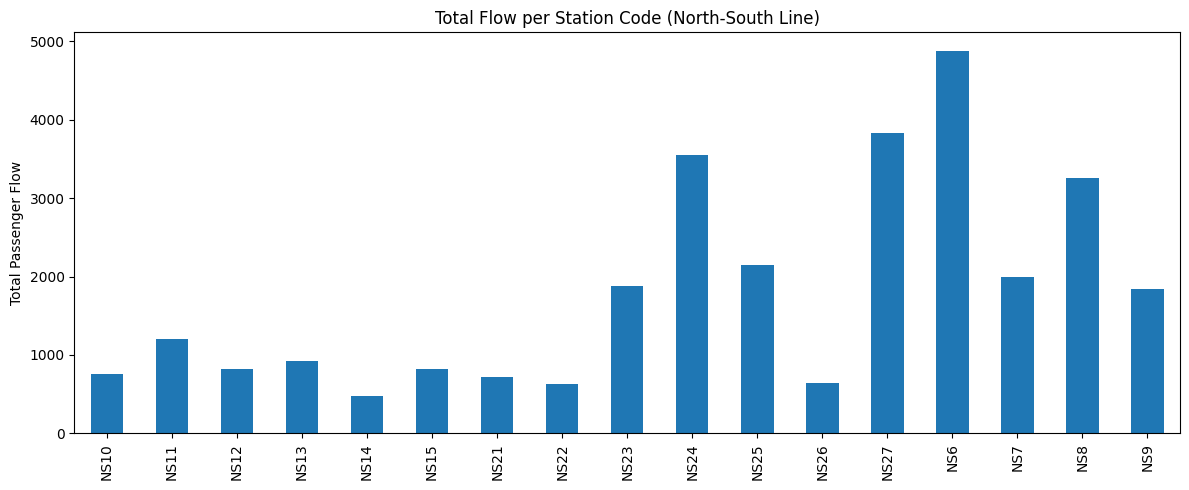

In [9]:
pfu.plot_flow_by_column(
    df_ew,
    title=f'Total Flow per Station Code ({LINE_NAME})'
)

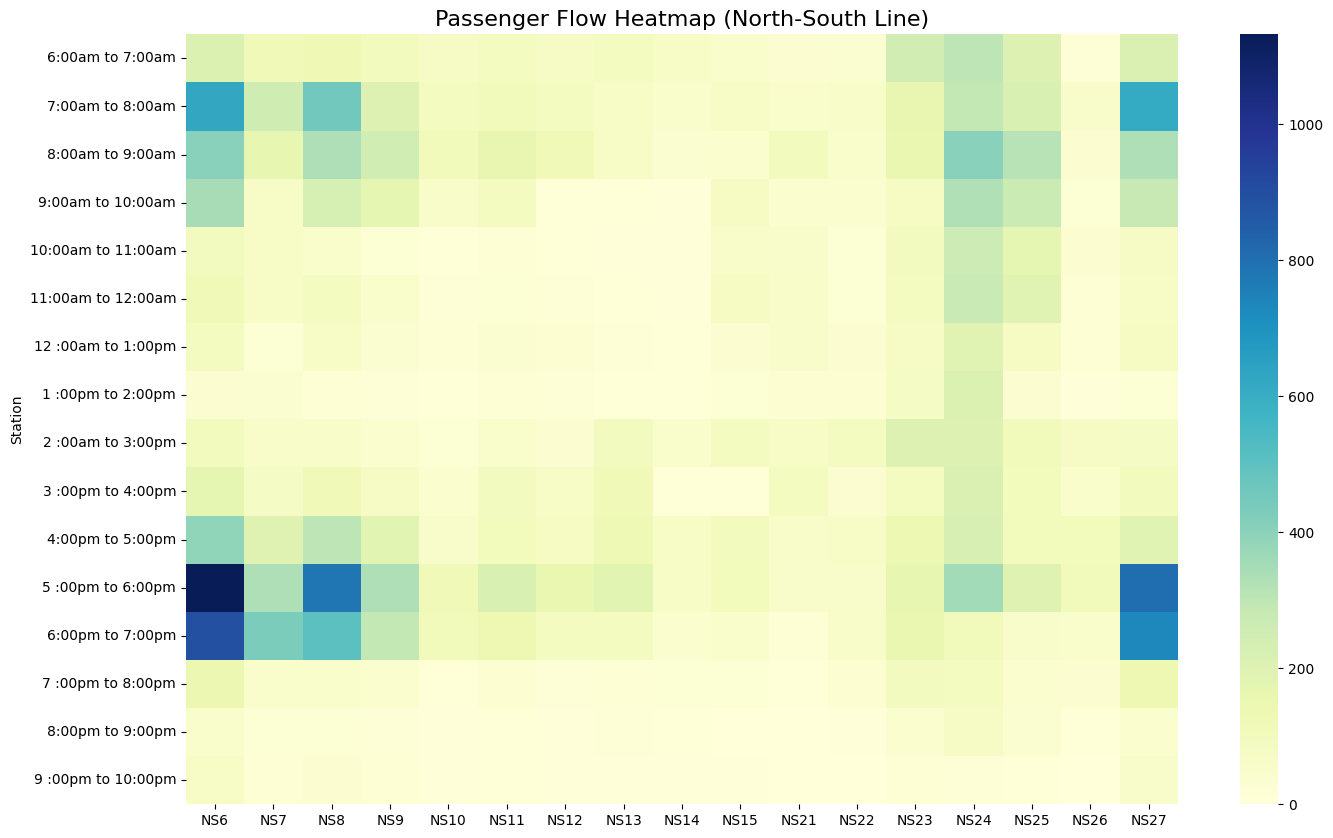

In [10]:
pfu.plot_flow_heatmap(
    df_ew,
    title=f'Passenger Flow Heatmap ({LINE_NAME})'
)

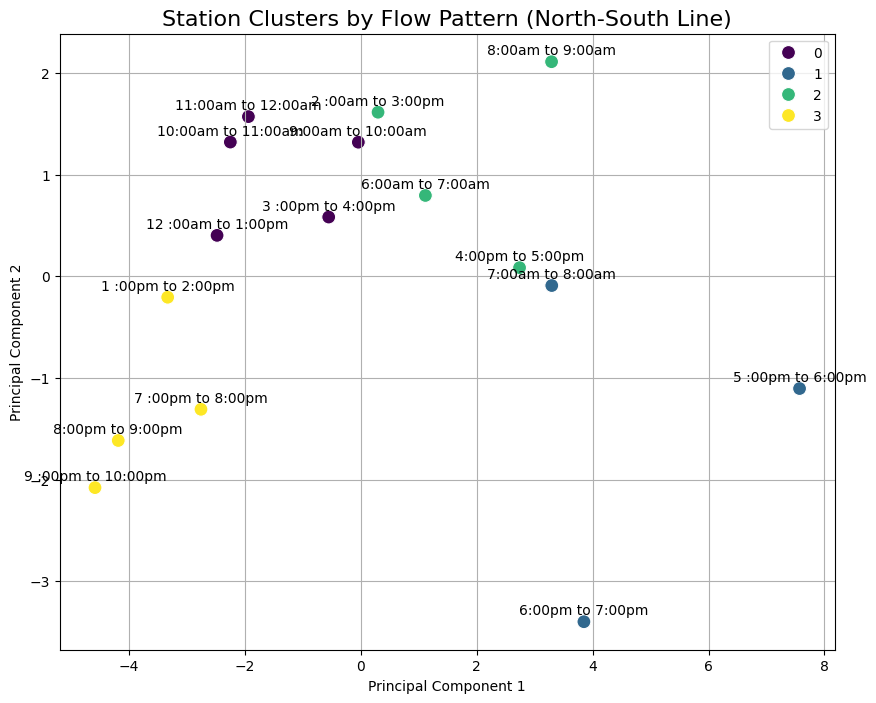

In [11]:
pfu.plot_station_clusters(
    df_ew,
    n_clusters=4, # You can experiment with this number
    title=f'Station Clusters by Flow Pattern ({LINE_NAME})'
)

In [12]:
top_stations, bottom_stations = pfu.get_top_bottom_stations(df_ew, n=5)

print(f"--- Top 5 Busiest Stations ({LINE_NAME}) ---")
display(top_stations)

print(f"\n--- Top 5 Least Busy Stations ({LINE_NAME}) ---")
display(bottom_stations)

--- Top 5 Busiest Stations (North-South Line) ---


,Station,TotalFlow
11,5 :00pm to 6:00pm,5174
12,6:00pm to 7:00pm,3823
1,7:00am to 8:00am,3443
2,8:00am to 9:00am,3088
10,4:00pm to 5:00pm,2499



--- Top 5 Least Busy Stations (North-South Line) ---


,Station,TotalFlow
6,12 :00am to 1:00pm,896
13,7 :00pm to 8:00pm,839
7,1 :00pm to 2:00pm,605
14,8:00pm to 9:00pm,389
15,9 :00pm to 10:00pm,288


In [13]:
summary_table = pfu.create_summary_table(df_ew)

print(f"--- Full Summary Table ({LINE_NAME}) ---")
display(summary_table)

--- Full Summary Table (North-South Line) ---


,Station,Total Flow,Busiest Code,Least Used Code
0,5 :00pm to 6:00pm,5174,NS6,NS22
1,6:00pm to 7:00pm,3823,NS6,NS21
2,7:00am to 8:00am,3443,NS6,NS14
3,8:00am to 9:00am,3088,NS6,NS26
4,4:00pm to 5:00pm,2499,NS6,NS10
5,9:00am to 10:00am,2136,NS6,NS14
6,6:00am to 7:00am,2050,NS24,NS26
7,3 :00pm to 4:00pm,1464,NS24,NS14
8,2 :00am to 3:00pm,1408,NS24,NS10
9,11:00am to 12:00am,1197,NS24,NS14
